Merhaba,

Bu çalışma sayfasında kümeleme analizi ile ilgili hem açıklayıcı bilgileri hemde konu ile ilgili bir örnek paylaşacağım.

İyi çalışmalar!

Yararlandığım kaynak --> Prof. Dr. Reha Alpar UYGULAMALI ÇOK DEĞİŞKENLİ İSTATİSTİKSEL YÖNTEMLER

[https://www.detayyayin.com.tr/urun/uygulamali-cok-degiskenli-istatistiksel-yontemler](http://)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Kümeleme Analizi Nedir?**

Kümeleme analizi, ham (gruplanmamış) veri setindeki gözlemleri (kimi zaman değişkenleri) sahip oldukları özelliklere göre kümelemek amacıyla geliştirilmiş yöntemler topluluğudur.

Kümeleme analizi sonucunda elde edilecek kümelerin kendi içinde olabildiğince benzer, kümeler arasında ise olabildiğince farklı olması istenir.

Kümeleme analizinin temel amacı kümelerin elde edilmesidir yani veride hazır halde bulunan durumun tespitidir.

# Kümeleme Analizinin Bazı Zor Yanları

Kümeleme analizi uzun zamandır kullanılan bir yöntem olmasına karşın uygulamada bazı zorlukları yok değildir.

Bu zorlukların en başında kullanılan yönteme göre farklı sonuçların çıkması gelmektedir. Örneğin uzaklık matrisinde kullanılan hesaplama yönteminin değiştirilmesi var olan sonuçlardan bir hayli farklı çıkmasına neden olabilmektedir. Aynı şekilde küme sayısının belirlenmesi de bu zorluklar arasına dahil edilebilir. Eğer veri seti ile uğraşan araştımacı konu hakkında yeterli bilgiye sahip değilse veya bu bilgilere sahip birisinden yoksun ise küme sayısı belirlemede hata yapabilir veya farklı küme sayılarında yine farklı sonuçlara ulaşabilir. 

Bunların dışında kümeleme analizinde genel kabul "en iyi", "en doğru", "en performanslı" bir yöntem yoktur. Yani her konu kendine ait bir takım "en iyi" yöntemi barındırır fakat genelleştirebilmek mümkün değildir.

# Küme Sayısının Belirlenmesi

Kümeleme analizi aşamalı ve aşamalı olmayan kümeleme analizi diye ikiye ayrılabilir. Aşamalı kümeleme analizinde küme sayıları analizin sonucunda belirlenirken aşamalı olmayan kümeleme yöntemlerinde küme sayısı önceden araştırayı yapan kişi tarafında belirlenmelidir. Aşamalı için örnek: Seçmen analizi, Aşamalı olmayan kümeleme için örnek ise: Eğitim için uygulanan yeni bir yöntemin öğrenciler üzerine etkisi (başarılı, başarısız, nötr)

Küme sayısının belirlenmesinde kabul görmüş en iyi bir yöntem olmamasına rağmen en kullanışlı iki yöntem aşağıdadır.

1. Verinin nispeten küçük olduğu durumlarda geçerli olan yöntem: k = √n/2
(k = küme sayısı, n = gözlem sayısı)   
1. Temel bileşen analizi: Veri setindeki toplam değişkenliği 2 değişkene indirgeyerek bu 2 değişkenin grafiği üzerinde küme sayısının tespiti.

# Verileri Standartlaştırmak

Kümeleme analizinde temel amacımız kümelerin elde edilmesiydi. Kümeleri elde ederken grup içi homojen gruplar arası heterojen kümeler elde etmeye çalışıyorduk. Bu doğrultuda kümleri elde etmek için verinin standartlaştırılması kabul görmüş bir yöntemdir.

Neticede homojen gruplar elde etmek için verilerin aldıkları değerler arasında çok büyük farklılıkların olması iyi olmaz. Basit ve tamamen uydurulmuş bir veri seti düşünelim. Bu veri setinde boy değişkeni olsun. Birinci gözlemin boyu 150 cm ikinci gözlemin boyu ise 180 cm bu iki gözlem arasında 25 cm'lik boy farkı var ve bu aslında gözle görülürde bir farklıkltır öte yandan bir başka değişken ise ayakkabı numarası olsun ilk gözlem 36 numara iken ikinci gözlem 42 numara ayakkabı giysin buradaki fark 6 ve aslında burada da iki gözlem birbirinden farklıdır ama bir değişkendeki farklılık 25 diğeri ise 6 uzaklık ölçülerinin kullanıldığı kümeleme yöntemlerinde değişkenler arası birim farklılıklarına aşırı duyarlıdır.

**Genel bir kural olarak yaygınlığı fazla olan (örnekte boy değişkenidir) uzaklık benzerlik ölçülerinin etkisi daha fazladır. Bu nedenle verilerin standartlaştırılması gerekmektedir**.

# Uzaklık Matrisleri

Veri seti içindeki gözlemlerin hepsi aynı skala içinde standartlaştırıldıktan sonra uzaklık ölçüleri hesaplanabilir ve birbirine en yakın gözlemler ile kümeleme yapılabilmektedir.

Uzaklık hesabı için bir çok yöntem mevcuttur en bilinen yöntemler aşağıdaki gibi sıralanabilir:

Basit Öklit Uzaklığı
dij= √(𝑥𝑖1 −𝑥𝑗1)^2+(𝑥𝑖2 − 𝑥𝑗2)^2

Kare Öklit Uzaklığı
dij= (xi1-xj1)2 + (xi2-xj2)2

City-Block Uzaklığı
dij= (xi1-xj1)+(xi2-xj2)

Daha fazla bilgi için --> [https://dergipark.org.tr/en/download/article-file/55137](http://)

Uzaklık matrisindeki en küçük uzaklığa sahip iki gözlem dikkate alınır ve ilk kümeyi oluşturur daha sonra uzaklık matrisinden bu iki gözlem çıkarılarak yeni oluşan küme ve diğer gözlemlerin yeni uzaklık matrisi oluşturulur aynı işlemler tekrar tekrar yapılır.



# Kümeleme Analizinin Aşamaları

1. Veri matrisinin oluşturulması.
1. Benzerlik veya uzaklık matrisinin elde edilmesi.
1. Kümeleme yönteminin belirlenmesi.
1. Sonuçların yorumlanması.


# K-Means Kümeleme Yöntemi

K-means kümeleme yöntemi en çok tercih edilen kümeleme yöntemlerindendir. Algoritması çalışma mantığı şu şekildedir:

1. Küme sayısı önceden belirlenir.
1. Veri setine belirlenen küme sayısı kadar random küme merkezi noktası atılır.
1. Atılan bu küme merkez noktaları ile gözlemleri uzaklıklar hesaplanır her gözlem kendisine en yakın küme merkezine giderek oranın kümesine girer.
1. İlk kümeler oluştuktan sonra küme merkez noktaları bu sefer kendi kümelerin orta noktalarına taşınırlar.
1. Bu taşınma işleme sonunda tekrar yeni küme merkez noktaları ile gözlemler arasındaki uzaklıklar hesaplanarak yeni kümeler oluşturulur.
1. Buradan sonra 4. ve 5. adım kümelerin stabil olmasına kadar sürekli tekrarlanır.

K-means algoritmasını anlatan güzel bir video --> [https://www.youtube.com/watch?v=4b5d3muPQmA](http://)

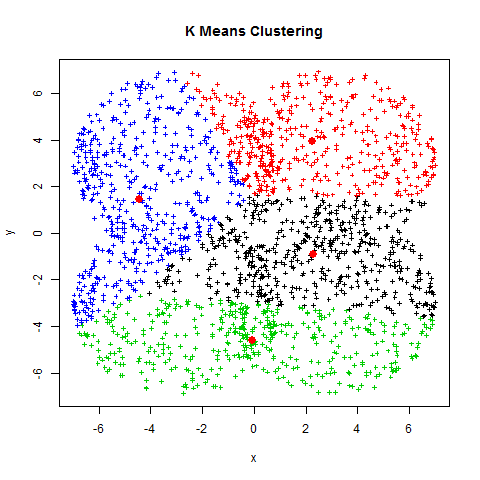

# Uygulama

Datanın yüklenmesi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data.head()

In [ ]:
len(data)

Cnsiyet dağılımı

In [ ]:
data["Gender"].value_counts()

Cinsiyetlerin ortalama gelir ve harcama skorları

In [ ]:
pd.pivot_table(data = data, columns = "Gender", values = ["Annual Income (k$)", "Spending Score (1-100)"],
               aggfunc = np.mean)

Yukarıdaki pivotta kadınların erkeklere göre ortalama olarak daha az gelirleri olmasına karşın harcama skorları daha yüksek çıkmıştır.

In [ ]:
pd.pivot_table(data = data, columns = "Gender", index = "Age", values = ["Annual Income (k$)", "Spending Score (1-100)"],
               aggfunc = np.mean)

Yaşlara göre ortalama gelir ve harcama skorları üzerine net bir şey söylemek çok mümkün değil fakat 20-30 yaş arası kadın ve erkeklerin harcama skorları görece yüksek gibi. Grafik üzerinden bu değişkenleri inceleyelim.

In [ ]:
import seaborn as sns
sns.scatterplot(x = data["Age"], y = data["Spending Score (1-100)"], hue = data["Gender"])

In [ ]:
sns.scatterplot(x = data["Age"], y = data["Annual Income (k$)"], hue = data["Gender"])

Gelir bakımından 30-40 yaş arası daha yüksek gibi gözüküyor.

Harcama skoru ve gelirin grafiğini inceleyelim.

In [ ]:
sns.scatterplot(x = data["Spending Score (1-100)"], y = data["Annual Income (k$)"], hue = data["Gender"])

Burada dikkatimi çeken şey gelirin 80-140 arası olan iki grup var bunların birincisinin harcama skoru oldukça düşük 0-20 aralığında ikinci grubun ise tam tersi 80-100 aralığında açıkcası gelir arttıkça harcama skorununda artmasını bekliyordum fakat net şekilde ikiye ayrılmış aynı durum 0-40 arası gelire sahipler içinde geçerli belki bu farklılığın nedeni yaşlardan kaynaklanıyor olabilir.

In [ ]:
yas_1 = data.loc[data["Age"] < 36]
yas_2 = data.loc[data["Age"] > 35]

yas_1["Age_"] = 0
yas_2["Age_"] = 1

data_2 = pd.concat([yas_1, yas_2], axis = 0)
data_2["Age_"].value_counts()

In [ ]:
sns.scatterplot(x = data_2["Spending Score (1-100)"], y = data_2["Annual Income (k$)"], hue = data_2["Age_"])

Evet buradaki farklılık aslında yaştan kaynaklanıyormuş. Geliri yüksek ve harcama skoru düşük olanlar genellikle 35 yaş üstü insanlar, geliri yüksek ve harcama skoru yüksek olanlar ise genellikle 35 yaş altı insanlar. 

Hatta genel olarak 35 yaş üstü insanların harcama skoru düşük 35 yaş altı insanların harcama skoru yüksek diyebiliriz.

Değişkenlerin kolerasyonlarına bakmak

In [ ]:
corr = data_2.corr()
corr

Değişkenleri birbirleri ile fazla bir ilişkisi yok. En fazla (CustomerID'yi görmezden gelelim) yeni oluşturduğumuz yaş değişkeni ile Harcama skoru arasında ters bir ilişki çıkıyor (%40)

Verileri standartlaştıralım ve ardından temel bileşen analizi uygularak 2 değişkene indirgeyelim.

Verimizi 2 değişken ile ne kadar temsil edibiliyoruz buna bakalım eğer çok bir kaybımız olmaz ise tüm veriyi bu şekilde bir grafiğini çizdirip küme sayımıza karar verelim.

In [ ]:
df = data_2.iloc[:, 1:6]
del df["Age"]

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df = sc.fit_transform(df)
    
df = pd.DataFrame(df, columns = ["Gender", "Income", "Spending Score", "Age"])



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

df_pca = pca.fit_transform(df)

df_pca

In [ ]:
print(sum(pca.explained_variance_ratio_))

Veriyi 2 değişkene indirgediğimiz zaman toplam açıklayıcılık %61'e düştü ki bu aslında pek iyi bir şey değil verimizin %40'ını kaybetmiş oluyoruz. Aynı işlemleri veride bulunan ilk age değişkeni ile birlikte tekrar deneyelim.

In [ ]:
df_2 = data.copy() 
del df_2["CustomerID"]

df_2["Gender"] = le.fit_transform(df_2["Gender"])

df_2 = sc.fit_transform(df_2)
    
df_2 = pd.DataFrame(df_2, columns = ["Gender", "Age", "Income", "Spending Score"])

pca_2 = PCA(n_components=2)

df_2_pca = pca_2.fit_transform(df_2)

print(sum(pca_2.explained_variance_ratio_))

Burada da sonuç hemen hemen aynı çıktı fakat yinede grafiğe bir göz bakalım.

In [ ]:
df_2_pca = pd.DataFrame(df_2_pca, columns = ["Veri1", "Veri2"])
plt.scatter(x = df_2_pca["Veri1"], y = df_2_pca["Veri2"])

2 değişkene indirdikten sonra veri kaybımız oldu bunu göz önüne almak lazım.

Belki aşağıdaki gibi kümeler oluşturulabilir.

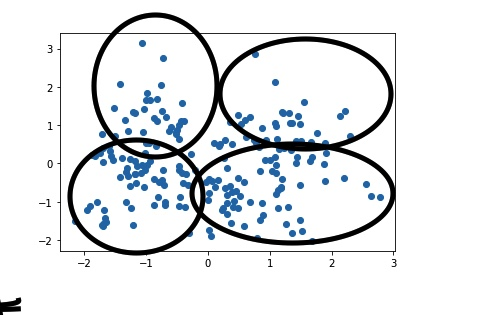

K-Means Algoritması ile analizler yapalım ve bu kümelerin sonuçlarını inceleyelim.

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 4, init = "k-means++")
x = data.iloc[:, 2:]
k_means.fit(x)

print(k_means.cluster_centers_)

In [ ]:
liste = []

for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = "k-means++", random_state = 123)
    k_means.fit(df.iloc[:, 2:])
    liste.append(k_means.inertia_)

plt.plot(range(1, 11), liste)

Bu grafikte görülen üzere küme sayısı için 4, 5 veya 6 değerini almak mantıklı gözküyor çümkü bıu noktalar dirsek noktaları.

In [ ]:
x = df.iloc[:,1:3]
k_means = KMeans(n_clusters = 4, init = "k-means++")
k_fit = k_means.fit(x)
kumeler = k_fit.labels_

fig, graf = plt.subplots(figsize = (15, 6))

plt.scatter(x.iloc[:,0], x.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

graf = plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);
plt.show()

In [ ]:
x = df.iloc[:,1:3]
k_means = KMeans(n_clusters = 5, init = "k-means++")
k_fit = k_means.fit(x)
kumeler = k_fit.labels_

fig, graf = plt.subplots(figsize = (15, 6))

plt.scatter(x.iloc[:,0], x.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

graf = plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);
plt.show()

In [ ]:
x = df.iloc[:,1:3]
k_means = KMeans(n_clusters = 6, init = "k-means++")
k_fit = k_means.fit(x)
kumeler = k_fit.labels_

fig, graf = plt.subplots(figsize = (15, 6))

plt.scatter(x.iloc[:,0], x.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

graf = plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);
plt.show()

5 kümeli grafiği tekrar çizdirelim. Siyah noktalar küme merkezlerini ifade etmektedir.

In [ ]:
x = df.iloc[:,1:3]
k_means = KMeans(n_clusters = 5, init = "k-means++")
k_fit = k_means.fit(x)
kumeler = k_fit.labels_

fig, graf = plt.subplots(figsize = (15, 6))

plt.scatter(x.iloc[:,0], x.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

graf = plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);
plt.show()

Okuduğunuz için teşekkür ederim. Tekrar görüşmek üzere! 

:)